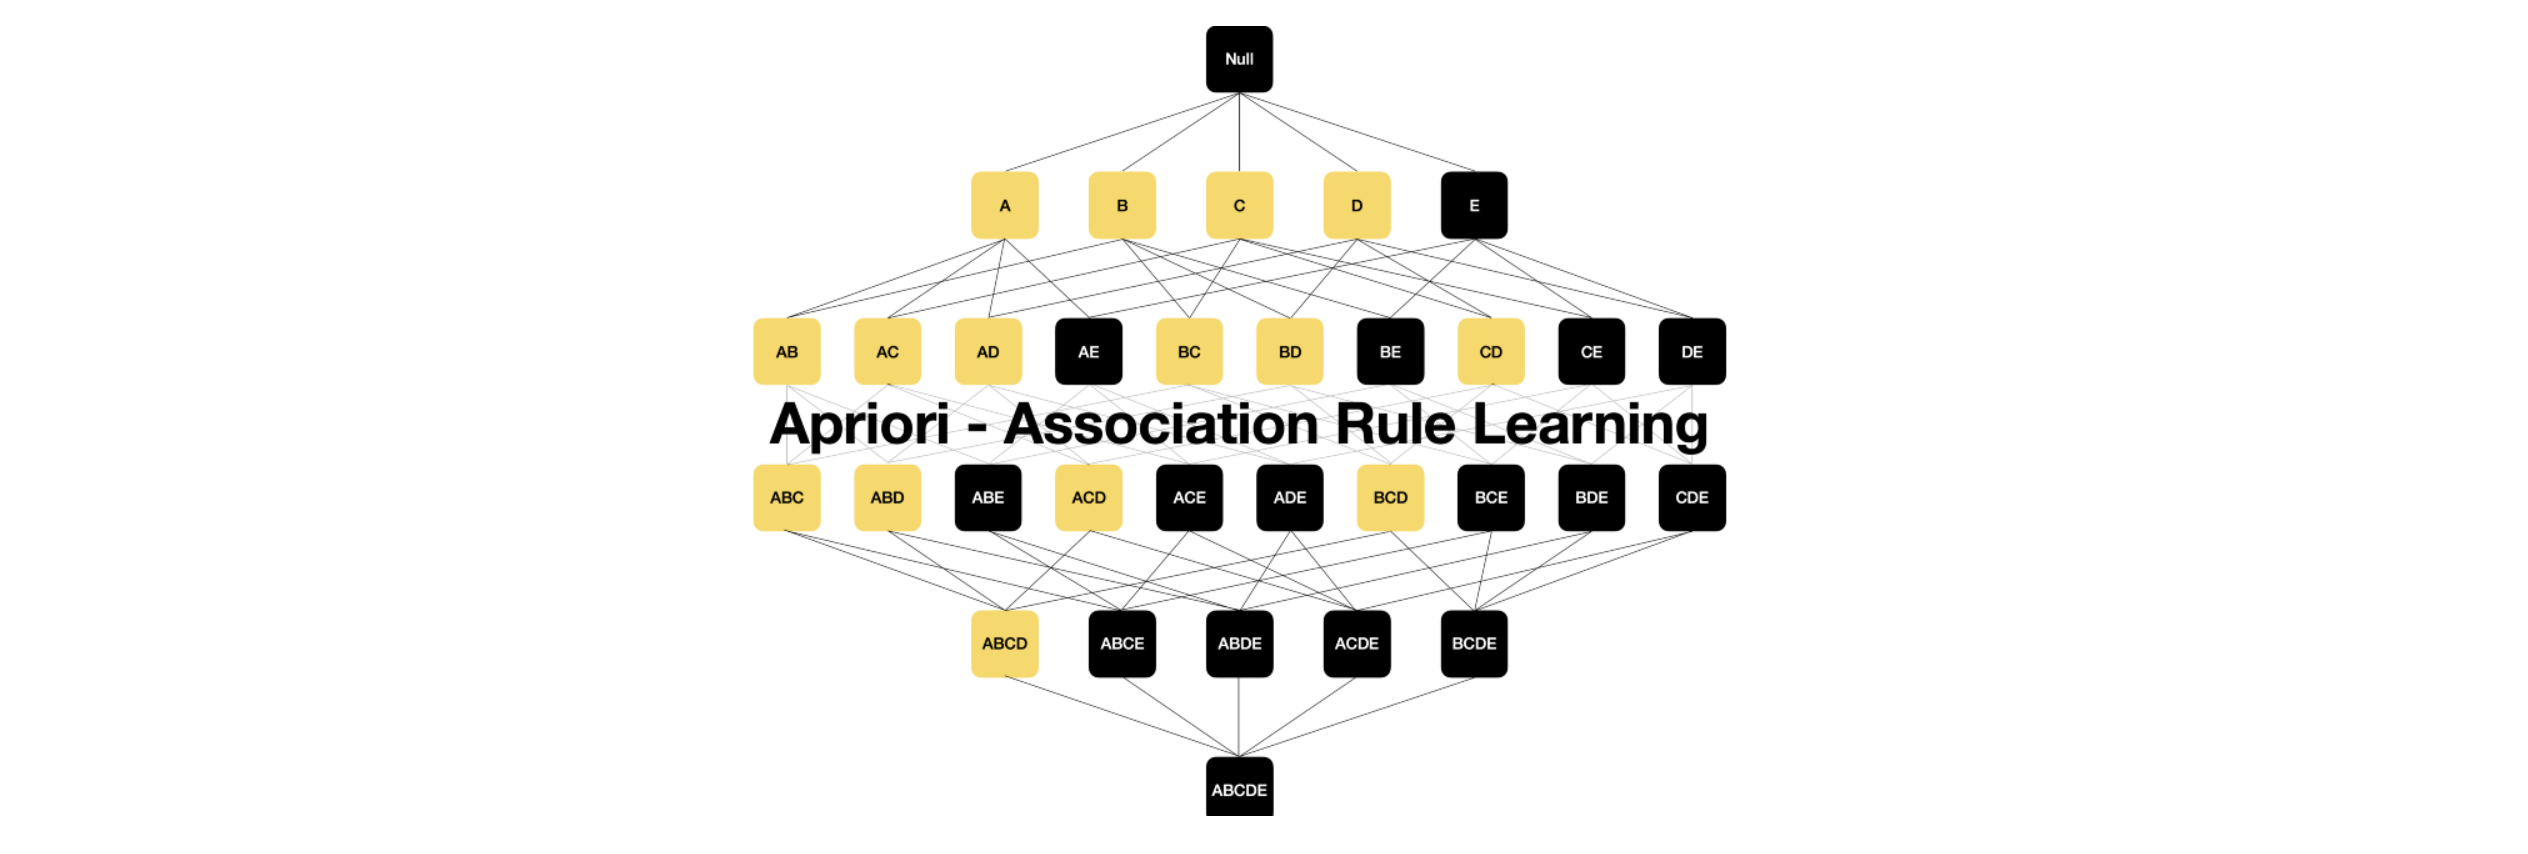

# Association Rule Learning 

Association rule learning is a kind of unsupervised learning technique that tests for the reliance of one data element on another data element and design appropriately so that it can be more cost-effective. It tries to discover some interesting relations or associations between the variables of the dataset. 

Market Based Analysis is one of the important methods used by large relations to show associations between items. Given a set of transactions or dataset, we can find rules that will predict the occurrence of specific item based on the occurrences of other items in the dataset.

### Apriori Algorithm:  

Apriori is given by R. Agrawal and R. Srikant in 1994 for frequent item set mining and association rule learning. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often. The name of the algorithm is Apriori because it uses prior knowledge of frequent itemset properties.*  

*https://en.wikipedia.org/wiki/Association_rule_learning  

**Support:** Support is an indication of how frequently the itemset appears in the dataset.  

                    Support(X,Y) =  Freq(X,Y) / N  

**Confidence:** Confidence is the percentage of all transactions satisfying X that also satisfy Y.

                    Confidence(X,Y) =  Freq(X,Y) / Freq(X)  

**Lift:**  The lift, also referred to as the interestingness measure, takes this into account by incorporating the prior probability of the rule consequent as follows:  

                    Lift = Support(X,Y) / Support(X)  *  Support(Y)  

If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.  
Lift < 1 implies that there is a negative relationship between X and Y

### About Dataset 

The data set consists of the services customers receive and the categories of these services. It contains the date and time information of each service received.

In [1]:
import datetime as dt
import pandas as pd

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('data.csv', parse_dates=['CreateDate'])

In [3]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162523 entries, 0 to 162522
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   UserId      162523 non-null  int64         
 1   ServiceId   162523 non-null  int64         
 2   CategoryId  162523 non-null  int64         
 3   CreateDate  162523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.0 MB


In [5]:
df.shape

(162523, 4)

**162253 rows in the dataset represent each unique invoice.**

In [6]:
df.isnull().sum()

UserId        0
ServiceId     0
CategoryId    0
CreateDate    0
dtype: int64

In [7]:
df['CreateDate'].min(), df['CreateDate'].max()

(Timestamp('2017-08-06 16:11:00'), Timestamp('2018-08-06 16:04:00'))

In [8]:
df['Month'] = df.CreateDate.dt.month

In [9]:
print('Number of unique Users     :', df['UserId'].nunique())
print('Number of unique Services  :', df['ServiceId'].nunique())
print('Number of unique Categories:', df['CategoryId'].nunique())

Number of unique Users     : 24826
Number of unique Services  : 50
Number of unique Categories: 12


In [10]:
month = df['Month'].value_counts().reset_index()

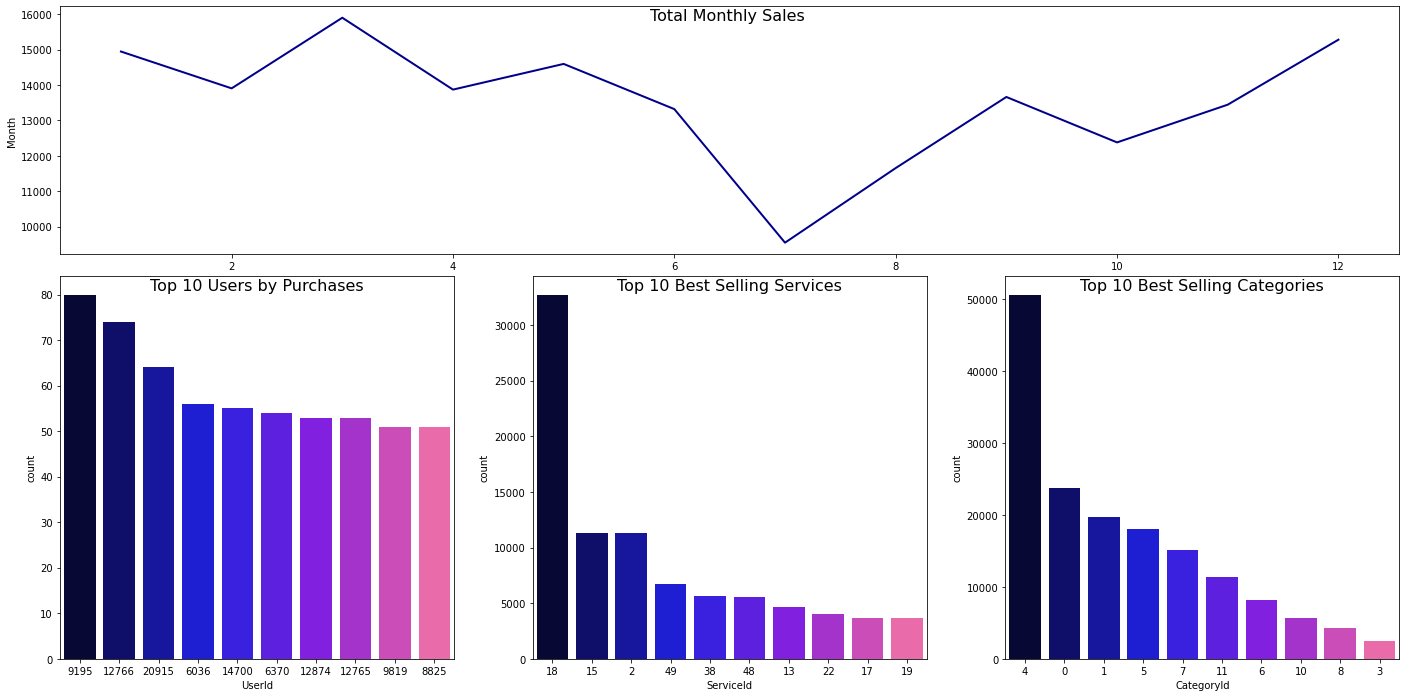

In [11]:
plt.figure(figsize=(24, 12))

gs = gridspec.GridSpec(5, 3)
ax1 = plt.subplot(gs[:2, :])
ax1 = sns.lineplot(data=month, y='Month', x='index', color='darkblue', linewidth=2)
ax1.set_title('Total Monthly Sales ', fontsize=16, y=1.0, pad=-14)

ax2 = plt.subplot(gs[2:5, :1])
palette = sns.color_palette('gnuplot2', 16)
ax2 = sns.countplot(x='UserId', order=df['UserId'].value_counts().index[:10], data=df, palette=palette)
ax2.set_title('Top 10 Users by Purchases', fontsize=16, y=1.0, pad=-14)

ax3 = plt.subplot(gs[2:5:, 1:2])
ax3 = sns.countplot(x='ServiceId', order=df['ServiceId'].value_counts().index[:10], data=df, palette=palette)
ax3.set_title('Top 10 Best Selling Services', fontsize=16, y=1.0, pad=-14)

ax4 = plt.subplot(gs[2:5, 2:])
ax4 = sns.countplot(x='CategoryId', order=df['CategoryId'].value_counts().index[:10], data=df, palette=palette)
ax4.set_title('Top 10 Best Selling Categories', fontsize=16, y=1.0, pad=-14)

plt.show()


- The month with the highest sales is the 3rd month and the sales in the summer season are considerably lower than the average.
- On average, more than 1 sale per week was made to the customers with the highest purchases.

### Data Preparation

In [12]:
df['ServiceId'] = df['ServiceId'].astype(str)
df['CategoryId'] = df['CategoryId'].astype(str)
df['UserId'] = df['UserId'].astype(str)
df['Month'] = df['Month'].astype(str)

In [13]:
df['Job'] = df['ServiceId'] + '_' + df['CategoryId']

**ServiceID represents a different service for each CategoryID.**

In [14]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Month,Job
0,25446,4,5,2017-08-06 16:11:00,8,4_5
1,22948,48,5,2017-08-06 16:12:00,8,48_5
2,10618,0,8,2017-08-06 16:13:00,8,0_8
3,7256,9,4,2017-08-06 16:14:00,8,9_4
4,25446,48,5,2017-08-06 16:16:00,8,48_5


**There is no basket definition in the data set.In this problem, the basket is expected to be defined as the services each customer receives on a monthly basis.**

In [15]:
df['BasketID'] = df['UserId'] + '_' + df.CreateDate.dt.year.astype(str) + '-' +  df['Month']

In [16]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Month,Job,BasketID
0,25446,4,5,2017-08-06 16:11:00,8,4_5,25446_2017-8
1,22948,48,5,2017-08-06 16:12:00,8,48_5,22948_2017-8
2,10618,0,8,2017-08-06 16:13:00,8,0_8,10618_2017-8
3,7256,9,4,2017-08-06 16:14:00,8,9_4,7256_2017-8
4,25446,48,5,2017-08-06 16:16:00,8,48_5,25446_2017-8


### Preparing ARL Data Structures

In [17]:
df_arl = df.groupby(['BasketID', 'Job'])['Job'].count().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

In [18]:
df_arl.head()

Job,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
frequent_itemsets = apriori(df_arl,
                            min_support=0.01,
                            use_colnames=True)

In [20]:
frequent_itemsets.sort_values('support', ascending=False)[:20]

,support,itemsets
8,0.238121,(18_4)
19,0.130286,(2_0)
5,0.120963,(15_1)
39,0.067762,(49_1)
28,0.066568,(38_4)
3,0.056627,(13_11)
12,0.047515,(22_0)
9,0.045563,(19_6)
15,0.042895,(25_0)
7,0.041533,(17_5)


In [21]:
rules = association_rules(frequent_itemsets,
                          metric='support',
                          min_threshold=0.01)

In [22]:
rules[(rules['support']>0.01) & (rules['confidence']>0.01) & (rules['lift']>2)]. \
sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(25_0),(22_0),0.042895,0.047515,0.011120,0.259247,5.456141,0.009082,1.285834
11,(22_0),(25_0),0.047515,0.042895,0.011120,0.234043,5.456141,0.009082,1.249553
18,(38_4),(9_4),0.066568,0.041393,0.010067,0.151234,3.653623,0.007312,1.129413
19,(9_4),(38_4),0.041393,0.066568,0.010067,0.243216,3.653623,0.007312,1.233418
5,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211
12,(22_0),(2_0),0.047515,0.130286,0.016568,0.348700,2.676409,0.010378,1.335350
13,(2_0),(22_0),0.130286,0.047515,0.016568,0.127169,2.676409,0.010378,1.091260
14,(25_0),(2_0),0.042895,0.130286,0.013437,0.313257,2.404371,0.007849,1.266432
15,(2_0),(25_0),0.130286,0.042895,0.013437,0.103136,2.404371,0.007849,1.067168


**antecedents :** previous product  
**consequents :** connected product  
**support     :**   how frequently the antecedents and consequents appear

#### Recommendations based on lift value

In [23]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values('lift', ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules['antecedents']):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]['consequents'])[0])

    return recommendation_list[0:rec_count]

In [24]:
arl_recommender(rules, '2_0', 1)

['22_0']

In [25]:
arl_recommender(rules, '38_4', 2)

['9_4', '15_1']

## Conclusion 

- According to the results of the study, 22_0 product can be recommended to a customer who buys 2_0 product.

- As a result , by using association rules , once item pairs have been identified as having positive relationship, recommendations can be made to customers in order to increase sales.  
 